In [1]:
import os
import pandas as pd
from typing import List
import matplotlib.pyplot as plt


BASE_PATH = os.path.dirname(os.getcwd())

É possível fazer um apanhado do preço do papel a partir deste [site](https://www.cepea.esalq.usp.br/br/categoria/florestal.aspx), contudo é um trabalho braçal reunir todas as informações necessárias.

In [2]:
# Carrega dataset com preços
dataset = pd.read_csv(f"{BASE_PATH}/data/hqs/prices_dataset.csv", sep="\t")

# Remove as editoras internacionais
dataset = dataset[(dataset.publisher != "VIZ MEDIA LLC") & (dataset.publisher != "VIZ MEDIA")]

# Padroniza nome de editora que veio em formatos diferentes
def conv_publisher(name: str):
    if name in ["MYTHOS", "KAZÉ MANGA", "VIZ MEDIA", "VIZ MEDIA LLC"]:
        return "OUTROS"
    elif name == "EDITORA JBC":
        return "JBC"
    else:
        return name

dataset.publisher = dataset.publisher.apply(lambda x: conv_publisher(x))

# Padroniza o formato de capa
conv_format = {
    "CAIXAS E COLEÇÕES": "OUTROS",
    "CANOA, GRAMPEADO OU COSTURADO": "CAPA COMUM",
    "CAPA CLÁSSICA COM BLOCAGEM": "CAPA COMUM",
    "CAPA COMUM": "CAPA COMUM",
    "CAPA DURA": "CAPA DURA",
    "CAPA FLEXÍVEL": "CAPA COMUM",
    "CAPA MOLE": "CAPA COMUM",
    "CAPA REFORÇADA": "CAPA COMUM",
    "CAPÍTULOS AVULSOS": "OUTROS",
    "ENCADERNAÇÃO COM GRAMPOS": "OUTROS",
    "LIVRO (CAPA TANKOBON)": "CAPA COMUM",
    "LIVRO CARTONADO": "CAPA COMUM",
    "LIVRO COM BRINDE": "CAPA COMUM",
    "LIVRO DE BOLSO": "CAPA COMUM"
}
dataset.format = dataset.format.apply(lambda x: conv_format[x])

# Faz a remoção de registros anômalos no sentido de quantidade de páginas,
# que normalmente representam anúncios de kits de volumes. Também remove
# registros com categoria "OUTROS", que são campos não identificados.
dataset = dataset.loc[(dataset.pages < 800)]\
    .loc[(dataset.format != "OUTROS")]\
    .loc[(dataset.publisher != "OUTROS")]

# Extrai o ano de lançamento
dataset["release_year"] = dataset.release_date.apply(lambda x: int(x.split("-")[0]))

## Distribuição

Pela apresentação, fica evidente uma maior concentração de volumes nos últimos 2 anos. Considerando os acontecimentos globais do mercado, três explicações são possíveis:

1. As editoras cresceram e expandiram o seu catálogo de produtos;
2. Ocorreu uma série de reimpressões de volumes antigos;
3. Após 2 anos de lançamento, os volumes passam a não estar facilmente disponíveis na Amazon

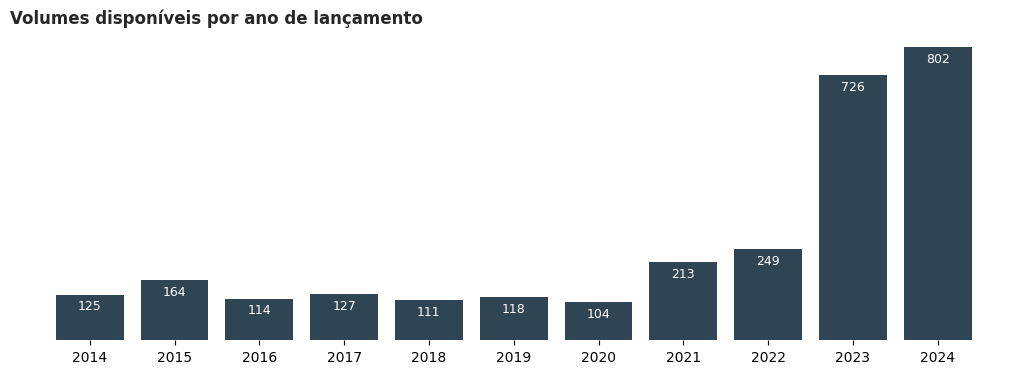

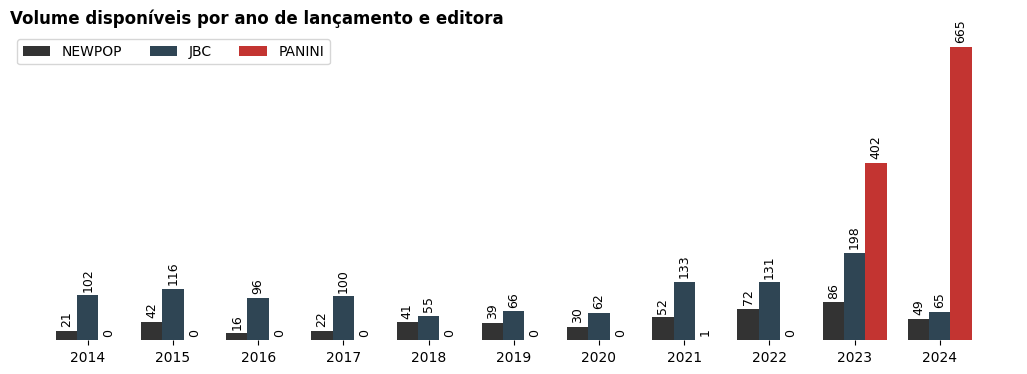

In [83]:
# Define o range de anos que serão avaliados
selected_years = list(range(2014, 2025))

# Calcula a quantidade de volumes disponíveis em cada ano
volumes_count = [list(dataset["release_year"]).count(y) for y in selected_years]

# Cria o gráfico com as configurações básicas
plt.figure(figsize=(13, 4))
ax = plt.subplot(111)
ax.set(frame_on=False)

ax.set_title("Volumes disponíveis por ano de lançamento", color="#272727", fontdict={"fontweight": 800}, loc="left")
ax.axes.get_yaxis().set_visible(False)
ax.set_xticks(selected_years)

# Configura as barras
ax.bar(selected_years, volumes_count, color="#2f4554")

# Método 1 para adicionar labels nas colunas
for rect, label in zip(ax.patches, volumes_count):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height - 50,
        label,
        ha="center",
        va="bottom",
        fontsize=9,
        color="#fff"
    )
plt.show()

# Define as editoras, colres e tamanhos de colunas
publishers = ["NEWPOP", "JBC", "PANINI"]
colors = ["#333333", "#2f4554", "#c33431"]
volumes_count = []
width = 0.25

# Calcula os volumes disponíveis para cada editora
for publisher in publishers:
    subset = dataset.loc[(dataset.publisher == publisher)]
    volumes_count.append([list(subset.release_year).count(y) for y in selected_years])

# Configuração inicial do gráfico
plt.figure(figsize=(13, 4))
ax = plt.subplot(111)
ax.set(frame_on=False)

ax.set_title("Volume disponíveis por ano de lançamento e editora", fontdict={"fontweight": 800}, loc="left")
ax.axes.get_yaxis().set_visible(False)
ax.set_xticks(selected_years)

# Faz o desenho das barras para as editora
for i in range(0, len(volumes_count)):
    x = [s - width + i * width for s in selected_years]
    rect = ax.bar(x, volumes_count[i], width, label=publishers[i], color=colors[i])
    ax.bar_label(rect, padding=3, fontsize=9, rotation=90)

ax.legend(loc="upper left", ncols=len(publishers))
plt.show()

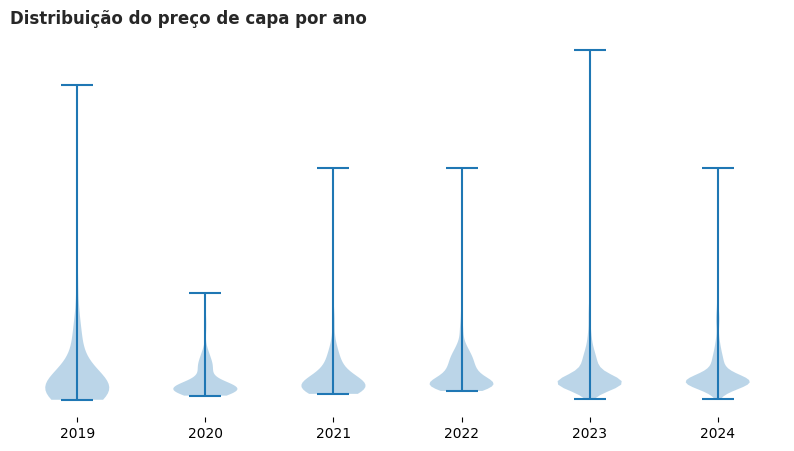

In [99]:
# Define o range de anos que serão avaliados
selected_years = list(range(2019, 2025))

# Cria o gráfico com as configurações básicas
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.set(frame_on=False)

ax.set_title("Distribuição do preço de capa por ano", color="#272727", fontdict={"fontweight": 800}, loc="left")
ax.axes.get_yaxis().set_visible(False)
#ax.set_xticks([i + 1 for i in range(0, len(selected_years))], labels=selected_years)

# Monta o box plot
x = [dataset.loc[dataset.release_year == y]["full_price"].values for y in selected_years]
ax.violinplot(x)
ax.set_xticks([i + 1 for i in range(0, len(selected_years))], labels=selected_years)
plt.show()

In [ ]:
# Exibir um gráfico de barras com os preços médios por editora nos últimos 5 anos
# Exibir um gráfico de barras com a quantidade de lançamentos por editora nos últimos 5 anos

# Fazer teste anova para todas
# Fazer teste de média para cada par